In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from PIL import Image

#ML bs 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,matthews_corrcoef
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Import Util
from util import *

In [2]:
DATA_DIR = 'data'
LABELS_FILE = os.path.join(DATA_DIR, 'labels.csv')
SETS_FILE = os.path.join(DATA_DIR, 'sets.csv')

In [3]:
labels_df = pd.read_csv(LABELS_FILE)
sets_df = pd.read_csv(SETS_FILE)
print(f"Loaded {len(labels_df)} labels and {len(sets_df)} sets.")

Loaded 1803 labels and 17 sets.


In [4]:
# Drop Nan rows
print(f"Labels before cleaning: {len(labels_df)}")
labels_df = labels_df.dropna(subset=['SensorFile'])
print(f"Labels after cleaning: {len(labels_df)}")

Labels before cleaning: 1803
Labels after cleaning: 1700


In [5]:
# Create dictionary: { 'sensor_filename.csv' : 'path/to/image.jpg' }
sensor_to_image_map = dict(zip(
    labels_df['SensorFile'].apply(os.path.basename), 
    labels_df['ImageFile']
))

# Create dictionary: { 'sensor_filename.csv' : wear_value }
sensor_to_wear_map = dict(zip(
    labels_df['SensorFile'].apply(os.path.basename), 
    labels_df['wear']
))

In [6]:
for root, dirs, files in os.walk(DATA_DIR):
    if os.path.basename(root) == 'sensordata':
        set_name = os.path.basename(os.path.dirname(root))
        
        # Check if already done
        target_pkl = os.path.join(DATA_DIR, f"{set_name}_linked.pkl")
        if os.path.exists(target_pkl):
            print(f"[{set_name}] Cache exists. Skipping.")
            continue
        
        # Run the processing function
        process_set_batch(root, set_name, sensor_to_image_map, sensor_to_wear_map, DATA_DIR)

print("All sets processed.")

[Set5] Cache exists. Skipping.
[Set2] Cache exists. Skipping.
[Set7] Cache exists. Skipping.
[Set17] Cache exists. Skipping.
[Set1] Cache exists. Skipping.
[Set4] Cache exists. Skipping.
[Set12] Cache exists. Skipping.
[Set10] Cache exists. Skipping.
[Set13] Cache exists. Skipping.
[Set6] Cache exists. Skipping.
[Set9] Cache exists. Skipping.
[Set8] Cache exists. Skipping.
[Set16] Cache exists. Skipping.
[Set11] Cache exists. Skipping.
[Set3] Cache exists. Skipping.
[Set14] Cache exists. Skipping.
[Set15] Cache exists. Skipping.
All sets processed.


In [7]:
set1_path = os.path.join(DATA_DIR, 'Set1_linked.pkl')

if os.path.exists(set1_path):
    set1_df = pd.read_pickle(set1_path)
    print(f"Loaded Set 1 Data: {set1_df.shape}")
else:
    print(f"File not found: {set1_path}")

Loaded Set 1 Data: (7628000, 10)


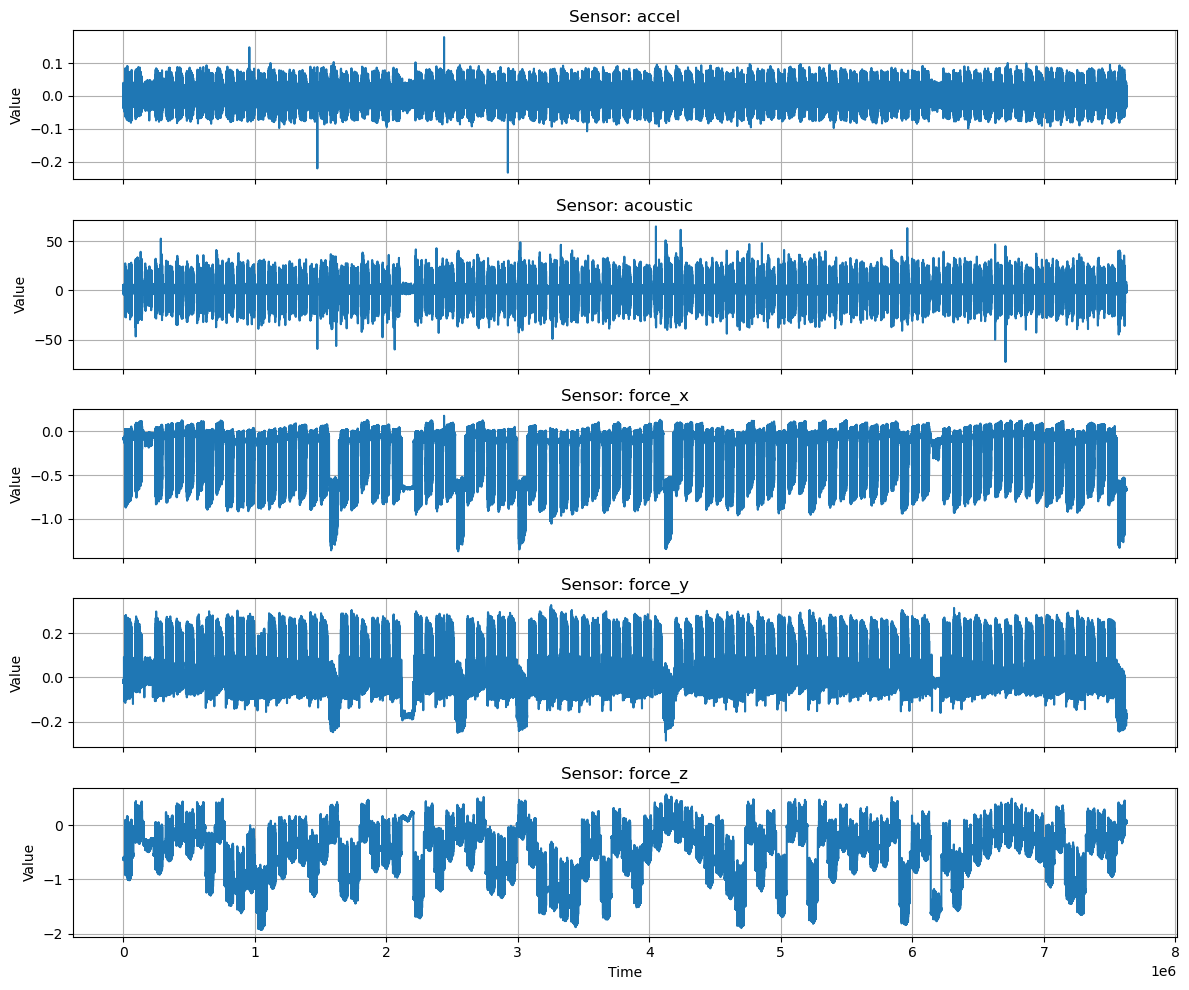

In [8]:
if 'set1_df' in locals():
    timeseries(set1_df)